In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df= pd.read_csv("./datasets_lab/adult.csv")


In [3]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df.describe

<bound method NDFrame.describe of        age     workclass  fnlwgt     education  educational-num  \
0       25       Private  226802          11th                7   
1       38       Private   89814       HS-grad                9   
2       28     Local-gov  336951    Assoc-acdm               12   
3       44       Private  160323  Some-college               10   
4       18             ?  103497  Some-college               10   
...    ...           ...     ...           ...              ...   
48837   27       Private  257302    Assoc-acdm               12   
48838   40       Private  154374       HS-grad                9   
48839   58       Private  151910       HS-grad                9   
48840   22       Private  201490       HS-grad                9   
48841   52  Self-emp-inc  287927       HS-grad                9   

           marital-status         occupation relationship   race  gender  \
0           Never-married  Machine-op-inspct    Own-child  Black    Male   
1      Ma

In [5]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [6]:
df.dropna(how="any", inplace=True)

In [7]:
df.drop_duplicates()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [10]:
df.isin(["?"]).sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [13]:
df["workclass"] = df["workclass"].replace("?",np.nan)
df["occupation"] = df["occupation"].replace("?",np.nan)
df["native-country"] = df["native-country"].replace("?",np.nan)

In [14]:
df.shape

(48842, 15)

In [15]:
df.drop(['fnlwgt','educational-num','marital-status','relationship', 'race',], axis = 1, inplace = True)

In [16]:
X= df.loc[:,["age","workclass","education","occupation","gender","capital-gain","capital-loss",	"hours-per-week","native-country"]]

In [17]:
y= df.loc[:,"income"]

In [20]:
X.head()

,age,workclass,education,occupation,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,11th,Machine-op-inspct,Male,0,0,40,United-States
1,38,Private,HS-grad,Farming-fishing,Male,0,0,50,United-States
2,28,Local-gov,Assoc-acdm,Protective-serv,Male,0,0,40,United-States
3,44,Private,Some-college,Machine-op-inspct,Male,7688,0,40,United-States
4,18,NaN,Some-college,NaN,Female,0,0,30,United-States


In [21]:
y.head()

0    <=50K
1    <=50K
2     >50K
3     >50K
4    <=50K
Name: income, dtype: object

In [22]:
numerical_features= X.select_dtypes('number')

In [23]:
categorical_features= X.select_dtypes('object')

In [26]:
converted_categorical_features = pd.get_dummies(categorical_features)
converted_categorical_features

,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,False,False,False,True,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
48838,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
48839,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
48840,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [28]:
all_features = [converted_categorical_features, numerical_features]

In [30]:
#new df
new_df= pd.concat(all_features,axis=1, join='inner')

In [31]:
new_df.shape

(48842, 85)

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_df, y, test_size=0.33, random_state=32)

In [34]:
from sklearn.tree import DecisionTreeClassifier
clf= DecisionTreeClassifier(max_depth=5)
clf.fit(X_train, y_train)
clf.score(X_train,y_train)

0.8260909424275761

In [36]:
y_pred= clf.predict(X_test)

In [38]:
y_pred.shape

(16118,)

In [39]:
predictions_df= pd.DataFrame()

In [44]:
predictions_df['predicted_salary']= y_pred
predictions_df['actual_salary_class']= y_test.values
predictions_df

,predicted_salary,actual_salary_class
0,<=50K,<=50K
1,<=50K,<=50K
2,<=50K,<=50K
3,<=50K,<=50K
4,<=50K,<=50K
...,...,...
16113,<=50K,<=50K
16114,>50K,<=50K
16115,<=50K,<=50K
16116,>50K,>50K


In [46]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred,y_test))

0.8247301153989328


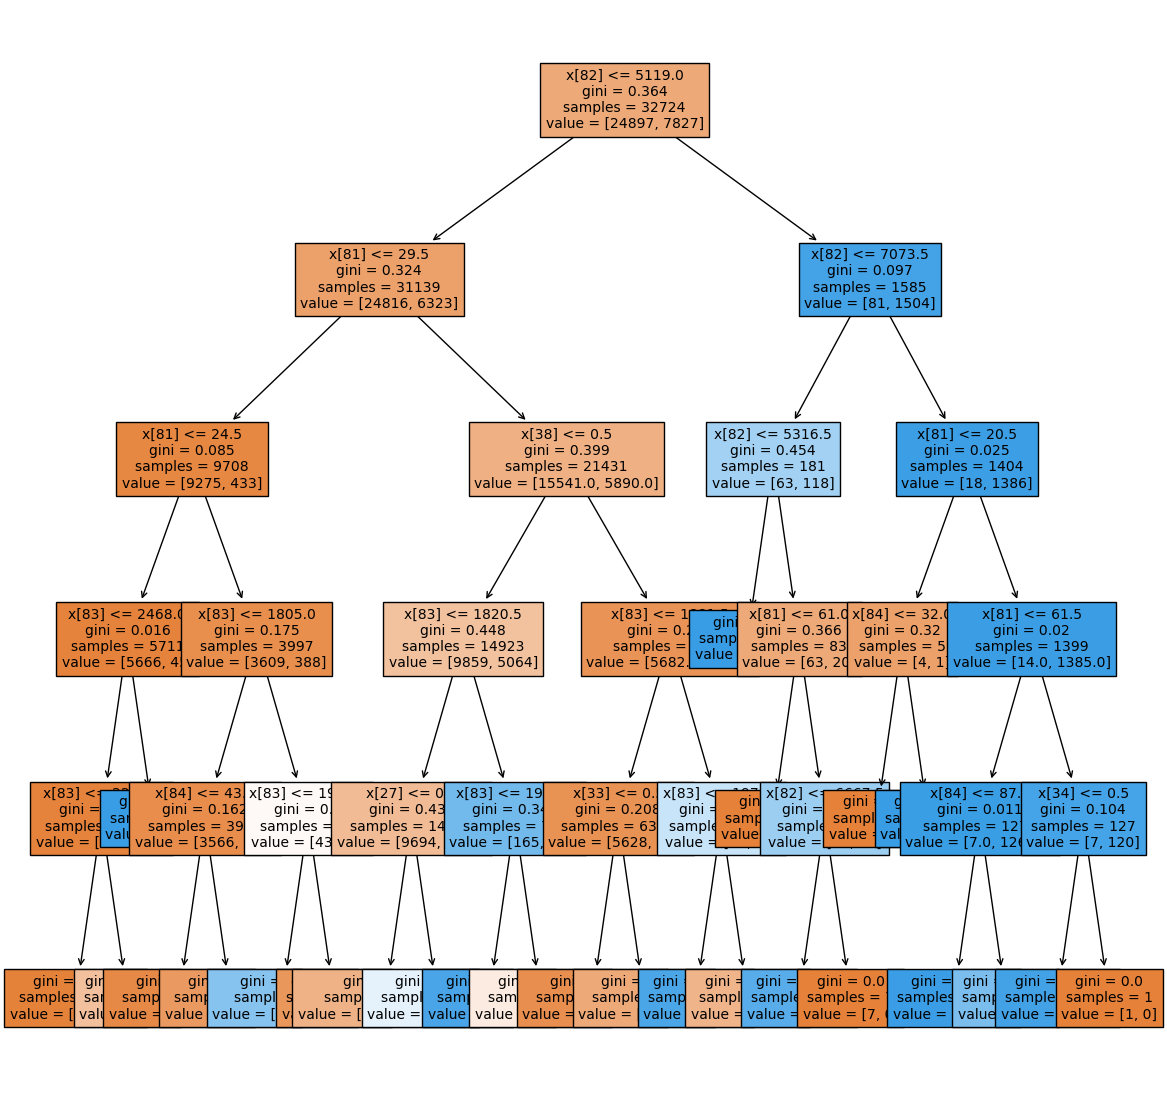

In [49]:
from sklearn.tree import plot_tree
plt.figure(figsize=(14,14))
plot_tree(clf, fontsize=10, filled=True)
plt.show()